**Salary comparison of different IT jobs**

*Uttaran Gangopadhyay*

Objective is to find out relations between job title, location, and salaries of various IT jobs.

In [7]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from PIL import Image
from IPython.display import Image
from wordcloud import WordCloud, STOPWORDS

In [8]:
df = pd.read_csv("/content/Software_Professional_Salaries.csv")
df.head()

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location
0,3.8,Sasken,Android Developer,400000,3,Bangalore
1,4.5,Advanced Millennium Technologies,Android Developer,400000,3,Bangalore
2,4.0,Unacademy,Android Developer,1000000,3,Bangalore
3,3.8,SnapBizz Cloudtech,Android Developer,300000,3,Bangalore
4,4.4,Appoids Tech Solutions,Android Developer,600000,3,Bangalore


In [9]:
df.shape

(22774, 6)

In [10]:
df.columns

Index(['Rating', 'Company Name', 'Job Title', 'Salary', 'Salaries Reported',
       'Location'],
      dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22774 entries, 0 to 22773
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rating             22774 non-null  float64
 1   Company Name       22774 non-null  object 
 2   Job Title          22774 non-null  object 
 3   Salary             22774 non-null  int64  
 4   Salaries Reported  22774 non-null  int64  
 5   Location           22774 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 1.0+ MB


In [12]:
df.describe()

,Rating,Salary,Salaries Reported
count,22774.000000,2.277400e+04,22774.000000
mean,3.918249,6.953606e+05,1.855625
std,0.519676,8.843263e+05,6.823078
min,1.000000,2.112000e+03,1.000000
25%,3.700000,3.000000e+05,1.000000
50%,3.900000,5.000000e+05,1.000000
75%,4.200000,9.000000e+05,1.000000
max,5.000000,9.000000e+07,361.000000


In [13]:
# checking for null values
df.isnull().sum()

Rating               0
Company Name         0
Job Title            0
Salary               0
Salaries Reported    0
Location             0
dtype: int64

In [14]:
# checking for duplicate rows
df.duplicated().sum()

0

In [15]:
# checking total number of unique values
df["Rating"].nunique()

41

In [16]:
df["Company Name"].nunique()

11263

In [17]:
df["Job Title"].nunique()

1084

In [18]:
df["Salaries Reported"].nunique()

82

In [19]:
df["Location"].unique()

array(['Bangalore', 'Chennai', 'Hyderabad', 'New Delhi', 'Pune', 'Jaipur',
       'Kerala', 'Kolkata', 'Madhya Pradesh', 'Mumbai'], dtype=object)

In [20]:
# finding out mean, median, max and min salary
print("Mean Salary:", round(df["Salary"].mean()))
print("Median Salary:", round(df["Salary"].median()))
print("Highest Salary:", round(df["Salary"].max()))
print("Lowest Salary:", round(df["Salary"].min()))

Mean Salary: 695361
Median Salary: 500000
Highest Salary: 90000000
Lowest Salary: 2112


In [21]:
# printing lowest 5 salaries
df["Salary"].sort_values()[:5]

22567     2112
9939      8448
5465     12000
13988    12000
15079    12000
Name: Salary, dtype: int64

In [22]:
# prinmting highest 5 salaries
df["Salary"].sort_values(ascending = False)[:5]

18639    90000000
4473     10000000
9262     10000000
7123     10000000
5821      9900000
Name: Salary, dtype: int64

In [23]:
df["Location"].value_counts()

Bangalore         8265
Hyderabad         4468
New Delhi         4176
Chennai           2458
Pune              2135
Mumbai             749
Kolkata            178
Madhya Pradesh     155
Kerala             108
Jaipur              82
Name: Location, dtype: int64

In [24]:
plt.figure(figsize = (30, 7))

<Figure size 2160x504 with 0 Axes>

<Figure size 2160x504 with 0 Axes>

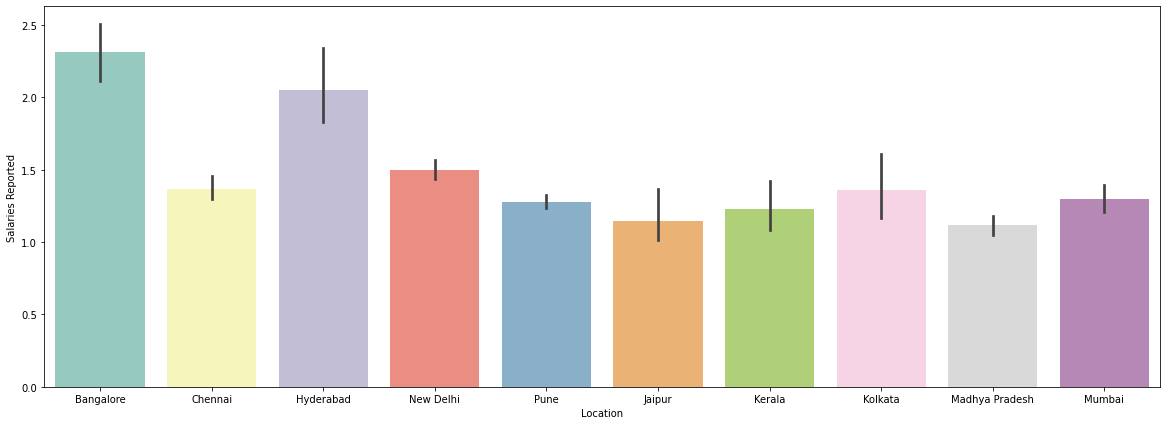

In [25]:
# barplot of location vs salary
plt.figure(figsize = (20, 7))
sns.barplot(x = df["Location"], y = df["Salaries Reported"], palette = "Set3");

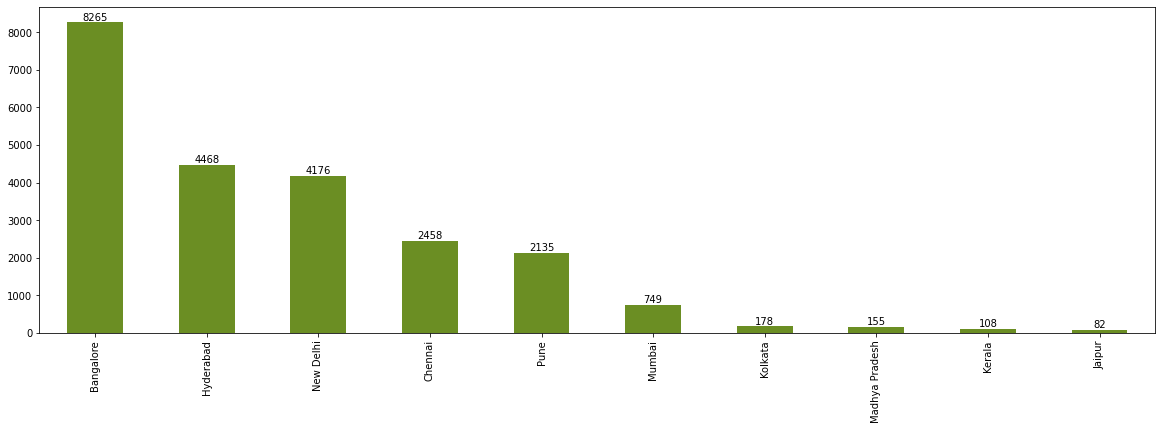

In [26]:
plt.figure(figsize = (20, 6))
ax = df.Location.value_counts().plot(kind = 'bar', color = 'olivedrab')

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')

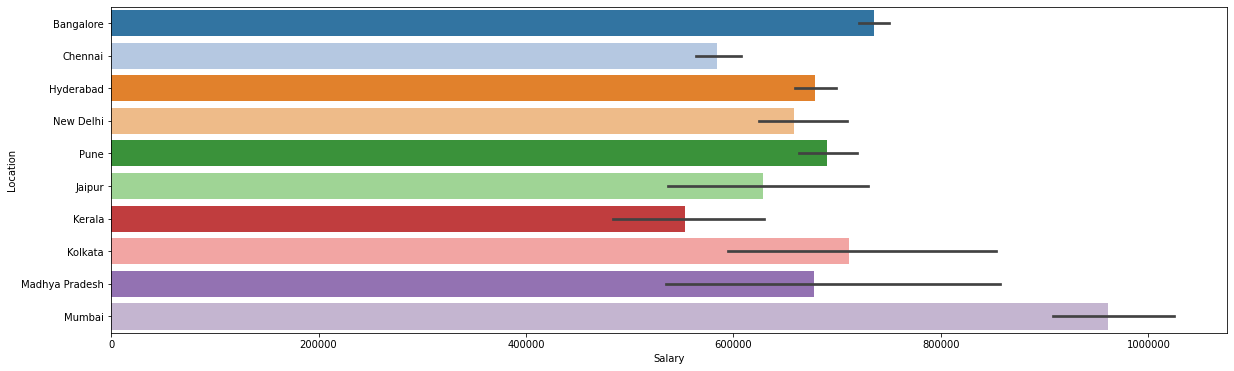

In [27]:
plt.figure(figsize = (20, 6))
plt.ticklabel_format(style = 'plain')
sns.barplot(x = df["Salary"], y = df["Location"], palette = "tab20");

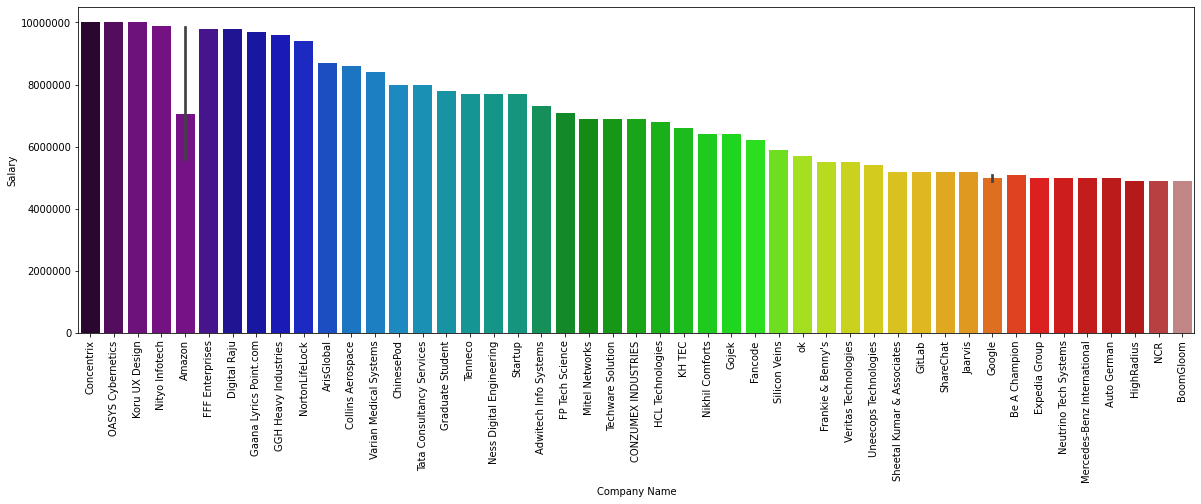

In [28]:
# barplot of company vs salary
plt.figure(figsize = (20, 6))
plt.xticks(rotation = 90)
plt.ticklabel_format(style = 'plain')
df.sort_values("Salary", axis = 0, ascending = False, inplace = True)
sns.barplot(x = df["Company Name"][1:51],
            y = df["Salary"][1:51],
            palette = "nipy_spectral");

In [29]:
df["Job Title"].value_counts()

Software Development Engineer             2351
Android Developer                         2029
Software Development Engineer (SDE)       1614
Front End Developer                       1412
Test Engineer                             1314
                                          ... 
Graduate Software Development Engineer       1
Python QA                                    1
Python/Pyspark                               1
Backend Engineer (Python)                    1
Ios App Developer - Intern                   1
Name: Job Title, Length: 1084, dtype: int64

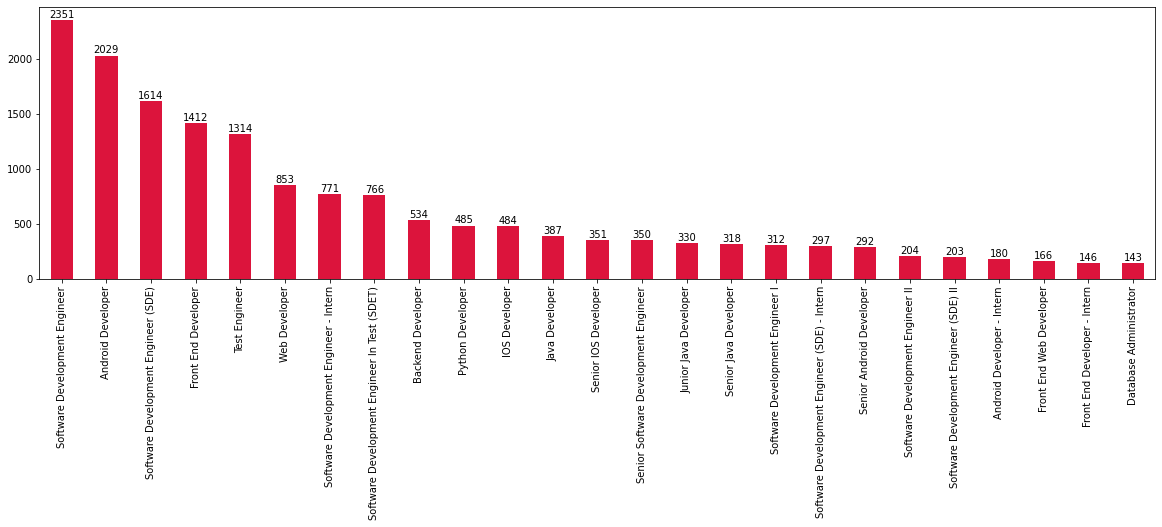

In [30]:
# differnet job titles
plt.figure(figsize = (20, 5))
ax = df["Job Title"].value_counts()[:25].plot(kind = 'bar',
                                              color = "crimson")

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')

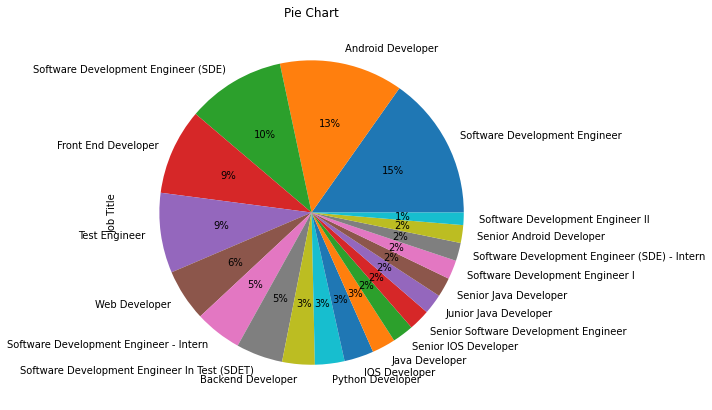

In [31]:
# pie chart of top 20 job titles
df["Job Title"].value_counts()[:20].plot.pie(figsize = (7, 7),
                                             autopct = '%1.0f%%')
plt.title("Pie Chart")
plt.xticks(rotation = 90)
plt.show()

In [32]:
df["Company Name"].value_counts()

Tata Consultancy Services         271
Amazon                            184
Infosys                           169
Accenture                         150
Cognizant Technology Solutions    144
                                 ... 
Tata Consulting Engineers           1
CodeCrew                            1
Shunda Express                      1
InnoApps                            1
Keeves Technologies                 1
Name: Company Name, Length: 11263, dtype: int64

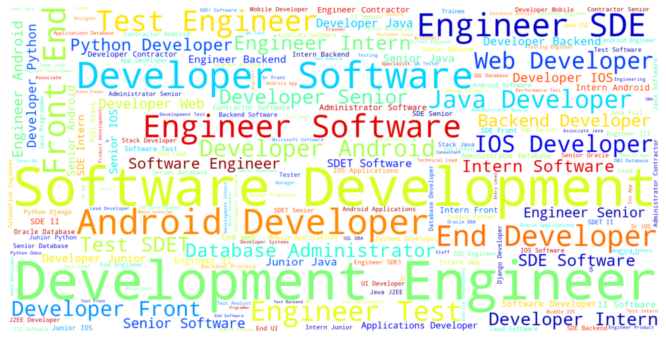

In [33]:
# job title word cloud
text = " ".join(Company for Company in df["Job Title"])
#font = "Quicksand-Bold.ttf"
word_cloud = WordCloud(width = 1600,
                       height = 800,
                       colormap = 'jet',
                       background_color = "white").generate(text)
plt.figure(figsize = (30, 6))
plt.imshow(word_cloud, interpolation = "gaussian")
plt.axis("off")
plt.show()

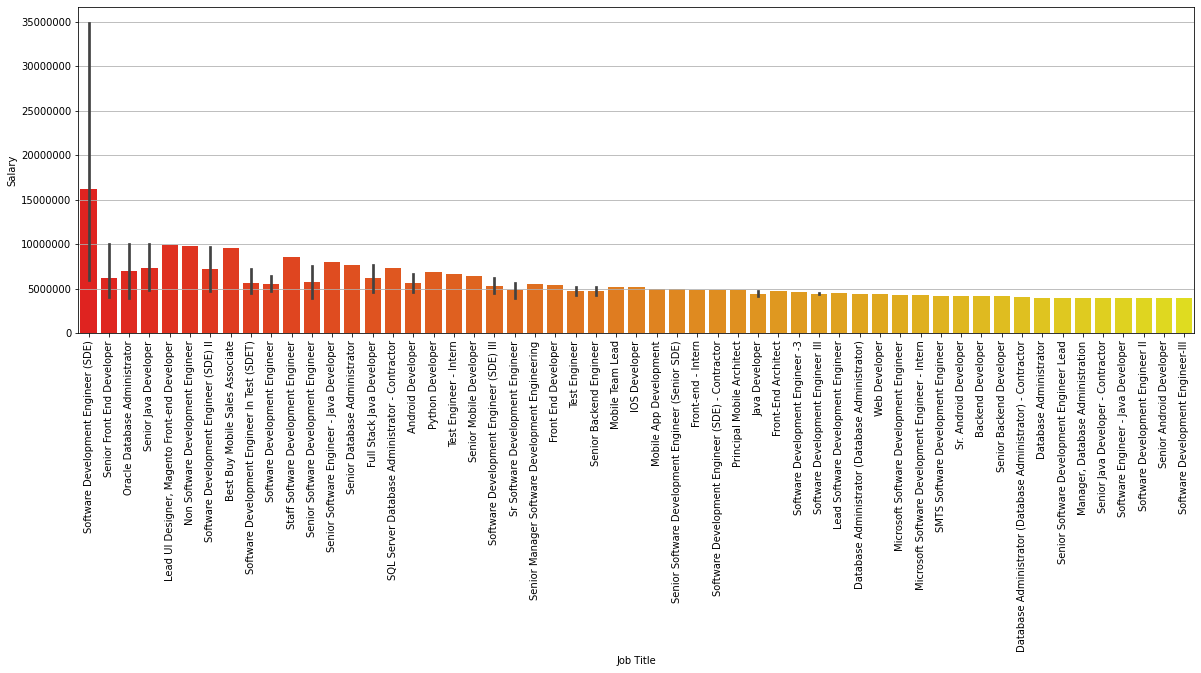

In [34]:
# salary vs job title comparison
plt.figure(figsize = (20, 6))
plt.grid()
plt.xticks(rotation = 90)
plt.ticklabel_format(style = 'plain')
df.sort_values("Salary", axis = 0,
                         ascending = False,
                         inplace = True)
sns.barplot(x = df["Job Title"][:100],
            y = df["Salary"],
            palette = "autumn");

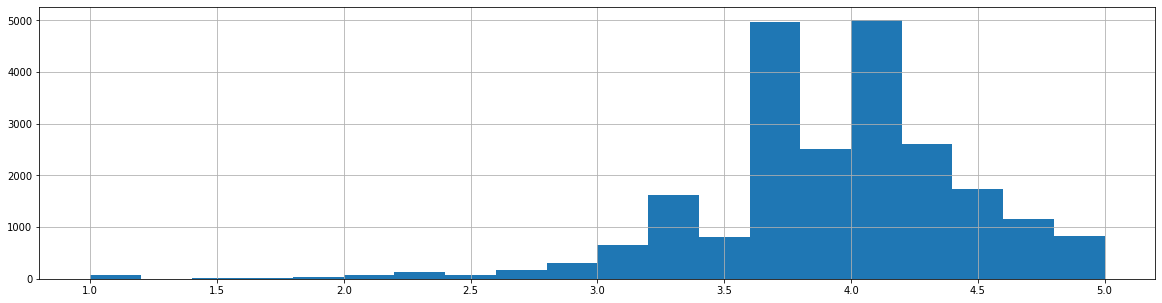

In [35]:
# ratings shown over a histogram
n_bins = 20
plt.figure(figsize = (20, 5))
df["Rating"].hist(bins = n_bins);

In [36]:
fig = px.scatter(df, x = "Rating", y = "Salaries Reported", color = "Location")
fig.show()

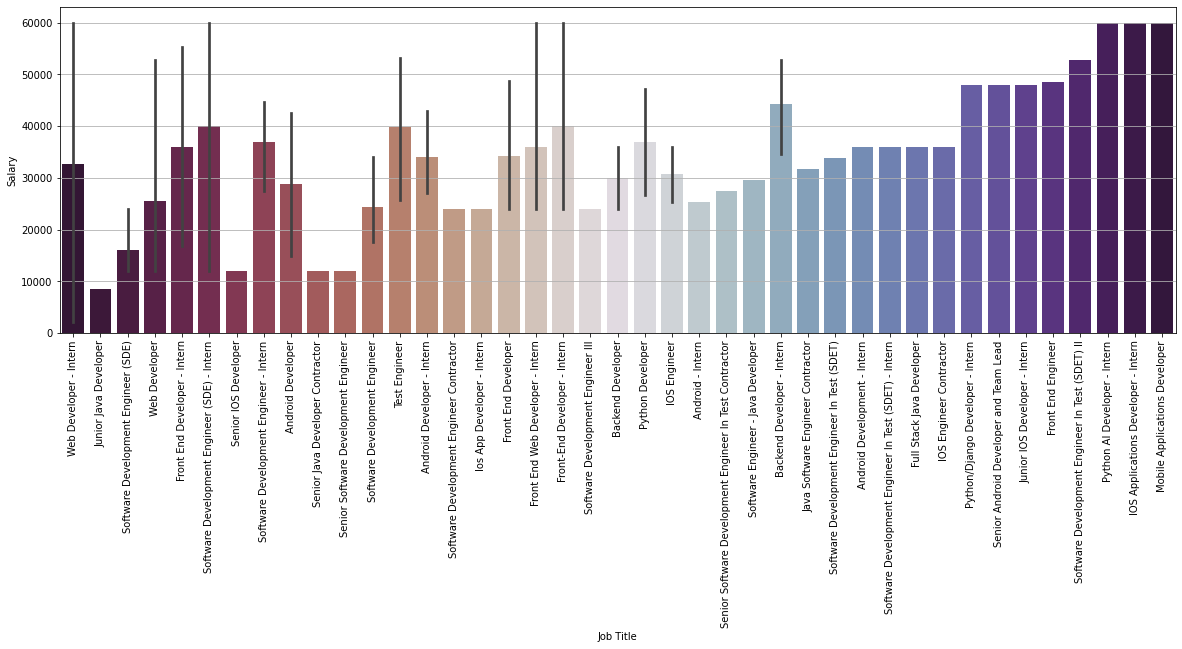

In [37]:
plt.figure(figsize = (20, 6))
plt.grid()
plt.xticks(rotation = 90)
plt.ticklabel_format(style = 'plain')
df.sort_values("Salary", axis = 0, ascending = True, inplace = True)
sns.barplot(x = df["Job Title"][:100], y = df["Salary"], palette = "twilight_shifted_r");

In [38]:
fig = px.scatter(df, x = "Rating", y = "Company Name", color = "Rating")
fig.show()

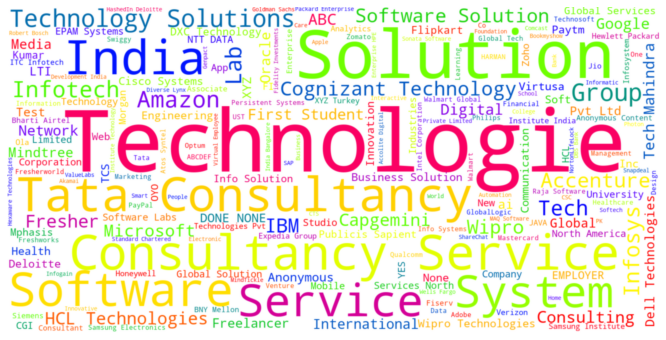

In [39]:
# company name word cloud
text = " ".join(Company for Company in df["Company Name"])
#font = "Quicksand-Bold.ttf"
word_cloud = WordCloud(width = 1600,
                       height = 800,
                       colormap = 'prism',
                       background_color = "white").generate(text)
plt.figure(figsize = (30, 6))
plt.imshow(word_cloud, interpolation="gaussian")
plt.axis("off")
plt.show()

In [42]:
new_df = pd.read_csv("/content/Salary_Dataset_with_Extra_Features.csv")
new_df.sample(5)

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
19307,4.3,Exposys Data Labs,Software Development Engineer (SDE) Contractor,348000,1,Pune,Contractor,SDE
2413,4.3,Josh Technology Group,Android Developer,500000,1,New Delhi,Full Time,Android
7950,4.3,Techavera Solutions,IOS Developer,396000,1,New Delhi,Full Time,IOS
18352,4.0,ajndkjna kjnsadkjna,Software Development Engineer (SDE),800000,1,New Delhi,Full Time,SDE
5088,4.1,Lenskart Solutions,Front End Developer,1600000,1,Bangalore,Full Time,Frontend


In [43]:
new_df["Employment Status"].value_counts()

Full Time     20083
Intern         2106
Contractor      548
Trainee          33
Name: Employment Status, dtype: int64

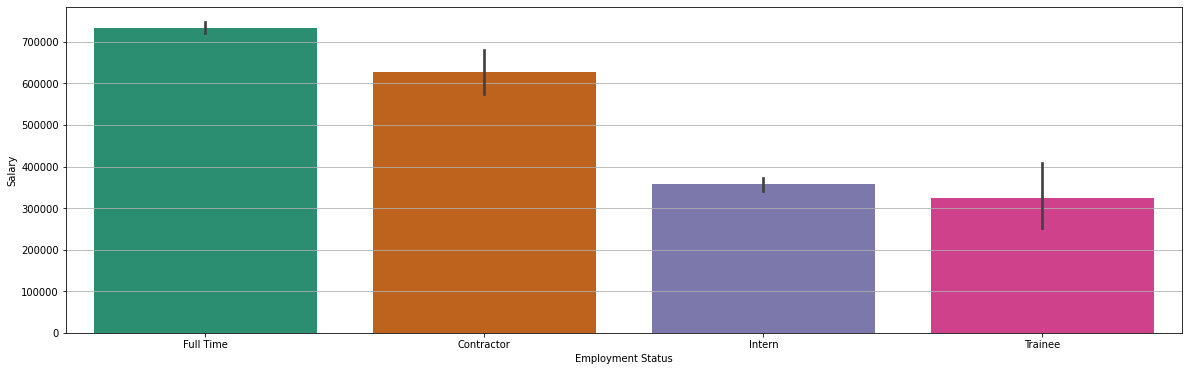

In [44]:
# barplot of employment vs salary
plt.figure(figsize = (20, 6))
plt.grid()
plt.ticklabel_format(style = 'plain')
new_df.sort_values("Salary", axis = 0, ascending = False, inplace = True)
sns.barplot(x = new_df["Employment Status"], y = new_df["Salary"], palette = "Dark2");

In [45]:
new_df["Job Roles"].value_counts()

SDE         8183
Android     2945
Frontend    2163
Java        1858
Testing     1740
IOS         1631
Backend     1194
Web          999
Python       947
Database     865
Mobile       245
Name: Job Roles, dtype: int64

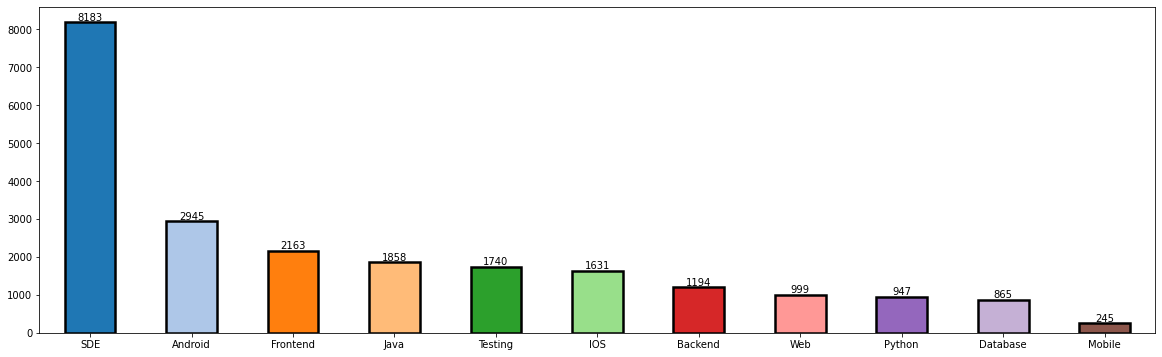

In [46]:
plt.figure(figsize = (20, 6))
col_map = plt.get_cmap('tab20')
ax = new_df["Job Roles"].value_counts().plot(kind = 'bar',
                                             color = col_map.colors,
                                             rot = 0, edgecolor = 'Black',
                                             linewidth = 2.5)

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')

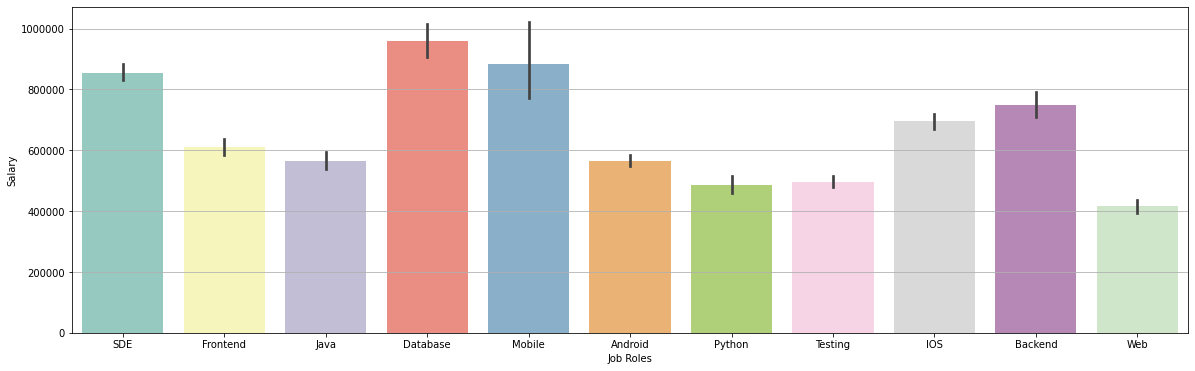

In [47]:
plt.figure(figsize = (20, 6))
plt.grid()
plt.ticklabel_format(style = 'plain')
new_df.sort_values("Salary", axis = 0, ascending = False, inplace = True)
sns.barplot(x = new_df["Job Roles"], y = new_df["Salary"], palette = "Set3");

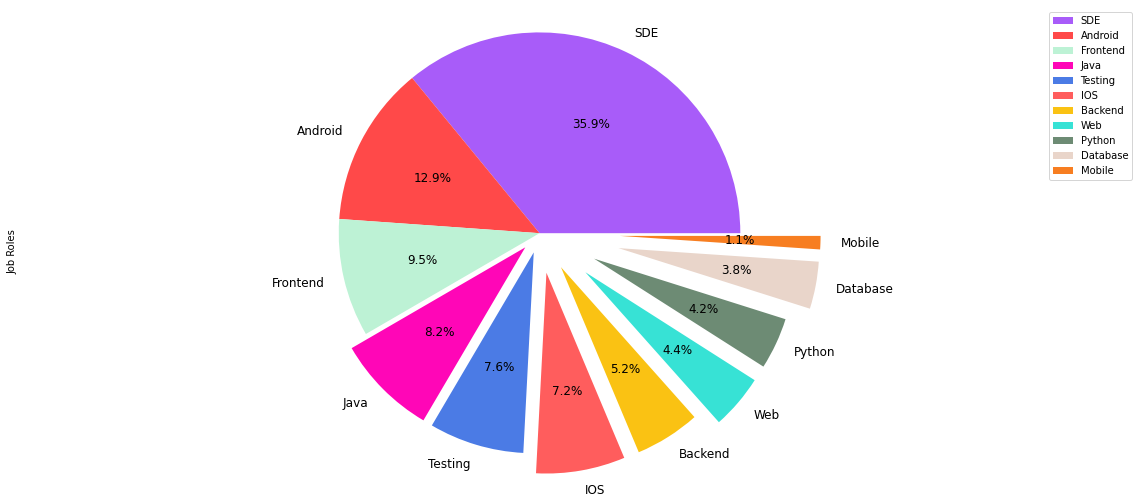

In [48]:
# pie char showing job roles
plt.figure(figsize = (20, 9))

counts = new_df["Job Roles"].value_counts()
explode = (0, 0, 0, 0.1, 0.1, 0.2, 0.2, 0.3, 0.3, 0.4, 0.4)
colors = ['#A85CF9', '#FF4949', '#BDF2D5', '#FF06B7', '#4B7BE5', '#FF5D5D', '#FAC213', '#37E2D5', '#6D8B74', '#E9D5CA', '#F77E21']

counts.plot(kind = 'pie', fontsize = 12, colors = colors, explode = explode, autopct = '%1.1f%%')
plt.axis('equal')
plt.legend(labels = counts.index, loc = "best")
plt.show()